In [17]:
# Config
import os
prefix = '../../'

In [18]:
# Imports
import matplotlib.pyplot as plt
from xai.utils.data_loading_utils import load_data_from_csv
from xai.utils.model_utils import generate_trained_model
from xai.performance_benchmarking.benchmarking_pipelines import robustness_benchmarking_pipeline
from xai.viz.util_viz import plot_robustness_comparisons

### Robustness test on regression (boston) dataset

In [19]:
data = os.path.join(prefix, 'datasets', 'boston_dataset.csv')
x, x_test, y, y_test, categorical_idx = load_data_from_csv(file_name=data, target_name='y',
                                                               max_levels=100, test_size=0.2, skiprows=False,
                                                               multiples_of_rows_to_skip=100)
model, is_classification = generate_trained_model('rf', x, x_test, y, y_test)


Identified 0 out of 13 features as categorical.

Input dataset shape: 
x (404, 13), 	y 404
Model type: <class 'sklearn.ensemble.forest.RandomForestRegressor'>
Model test performance: 	MSE = 7.721, 	R^2 = 0.895
Process took 0.19 s.


In [20]:
lips1, tdelta1 = robustness_benchmarking_pipeline(model, x, is_classification=False,explainer_type='shap', 
                                                  num_samples=100, random_seed=42,
                                                  lipshitz_optimiser='gbrt', lipshitz_bound_type='box', n_jobs=1)

lips2, tdelta2 = robustness_benchmarking_pipeline(model, x, is_classification=False,explainer_type='lime', 
                                                  num_samples=100, random_seed=42,
                                                  lipshitz_optimiser='gbrt', lipshitz_bound_type='box', n_jobs=1)

lips12, tdelta12 = robustness_benchmarking_pipeline(model, x, is_classification=False,explainer_type='shap', 
                                                    num_samples=100, random_seed=42,
                                                    lipshitz_optimiser='gp', lipshitz_bound_type='box', n_jobs=1)

lips22, tdelta22 = robustness_benchmarking_pipeline(model, x, is_classification=False,explainer_type='lime', 
                                                    num_samples=100, random_seed=42,
                                                    lipshitz_optimiser='gp', lipshitz_bound_type='box', n_jobs=1)

Initializing tree SHAP explainer wrapper
Missed points: 0/100
Time elapsed for shap with Gradient Boosted Tree opt 1.3e+02 s
Median Lipschitz estimate for shap = 4.26
Initializing tabular LIME explainer wrapper
Missed points: 0/100
Time elapsed for lime with Gradient Boosted Tree opt 4.1e+01 s
Median Lipschitz estimate for lime = 0.704
Initializing tree SHAP explainer wrapper
Missed points: 0/100
Time elapsed for shap with Gradient Boosted Tree opt 2.2e+02 s
Median Lipschitz estimate for shap = 4.32
Initializing tabular LIME explainer wrapper
Missed points: 0/100
Time elapsed for lime with Gradient Boosted Tree opt 1.4e+02 s
Median Lipschitz estimate for lime = 0.72


[130.4896960258484, 221.0157949924469, 40.611193895339966, 136.9921989440918]


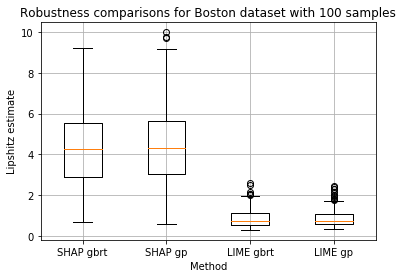

In [25]:
fig = plot_robustness_comparisons([lips1, lips12, lips2, lips22], dataset_name ='Boston',
                                  model_names=['SHAP gbrt', 'SHAP gp', 'LIME gbrt', 'LIME gp'])
print([tdelta1, tdelta12, tdelta2, tdelta22])
fig

### Robustness test on classification (census) dataset

In [26]:
data = os.path.join(prefix, 'datasets', 'census_dataset.csv')
x, x_test, y, y_test, categorical_idx = load_data_from_csv(file_name=data, target_name='y',
                                                               max_levels=100, test_size=0.2, skiprows=False,
                                                               multiples_of_rows_to_skip=100)
model, is_classification = generate_trained_model('rf', x, x_test, y, y_test)

Identified 0 out of 12 features as categorical.

Input dataset shape: 
x (26048, 12), 	y 26048
Model type: <class 'sklearn.ensemble.forest.RandomForestClassifier'>
Model test performance: 	AUC = 0.752, 	Gini = 0.504
Process took 1.09 s.


In [27]:
lips1, tdelta1 = robustness_benchmarking_pipeline(model, x, is_classification=True,explainer_type='shap', 
                                                  num_samples=100, random_seed=42,
                                                  lipshitz_optimiser='gbrt', lipshitz_bound_type='box', n_jobs=1)

lips2, tdelta2 = robustness_benchmarking_pipeline(model, x, is_classification=True,explainer_type='lime', 
                                                  num_samples=100, random_seed=42,
                                                  lipshitz_optimiser='gbrt', lipshitz_bound_type='box', n_jobs=1)

lips12, tdelta12 = robustness_benchmarking_pipeline(model, x, is_classification=True,explainer_type='shap', 
                                                    num_samples=100, random_seed=42,
                                                    lipshitz_optimiser='gp', lipshitz_bound_type='box', n_jobs=1)

lips22, tdelta22 = robustness_benchmarking_pipeline(model, x, is_classification=True,explainer_type='lime', 
                                                    num_samples=100, random_seed=42,
                                                    lipshitz_optimiser='gp', lipshitz_bound_type='box', n_jobs=1)

Initializing tree SHAP explainer wrapper
Missed points: 0/100
Time elapsed for shap with Gradient Boosted Tree opt 1.6e+02 s
Median Lipschitz estimate for shap = 0.103
Initializing tabular LIME explainer wrapper
Missed points: 0/100
Time elapsed for lime with Gradient Boosted Tree opt 5.8e+01 s
Median Lipschitz estimate for lime = 0.00661
Initializing tree SHAP explainer wrapper
Missed points: 0/100
Time elapsed for shap with Gradient Boosted Tree opt 2.8e+02 s
Median Lipschitz estimate for shap = 0.101
Initializing tabular LIME explainer wrapper
Missed points: 0/100
Time elapsed for lime with Gradient Boosted Tree opt 1.5e+02 s
Median Lipschitz estimate for lime = 0.00629


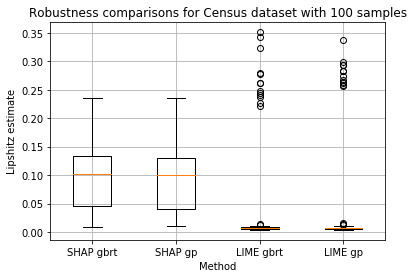

In [28]:
fig = plot_robustness_comparisons([lips1, lips12, lips2, lips22], dataset_name ='Census',
                                  model_names=['SHAP gbrt', 'SHAP gp', 'LIME gbrt', 'LIME gp'])
fig